# Simple Face Mask Detection - Q1

**Introduction**

In this notebook, we will be evaluating your basic image/video data pre-processing and computer vision based modeling skills. You will be evaluated under three key ares in any computer vision task namely,

- Basic Preprocessing Techniques
- Basic Model Developement
- Basic Inference Techniques

**Task Description**

With the covid-19 pandemic face mask detection is a very common problem nowdays in industry with many differnt solutions. Computer vision based solutions are still capable of identifying face masks in both still images and videos rather than other solutions. Developers suggested and developed many libraries and APIs to detect face masks using computer vision. In this notebook you will be asked to develop a simple face mask detection algorithm using computer vision.

In [ ]:
# Sample Class

class TestClass_1:
    
    def __init__(self):
        pass
    
    def method_1(self, parameter_1):
        pass
    
    def method_2(self, parameter_2):
        pass

    # There can be many methods
    
    def method_3(self, parameter_3):
        pass

### Basic Preprocessing Techniques

There are many vision based preprocessing techniques are out there. You will be asked to apply basic techniques such as,
- Input images/videos and read them
- Change color channels
- Crop, Resize etc

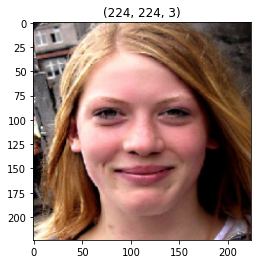

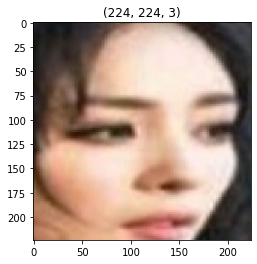

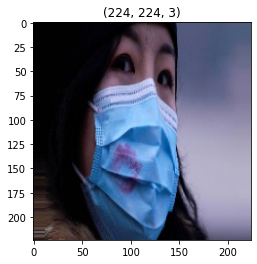

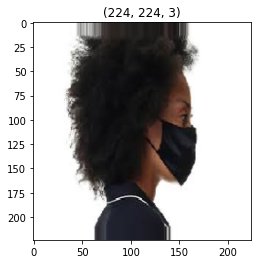

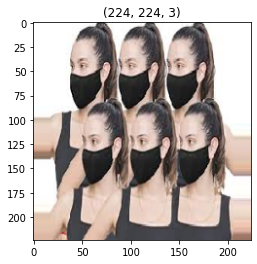

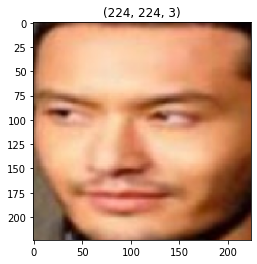

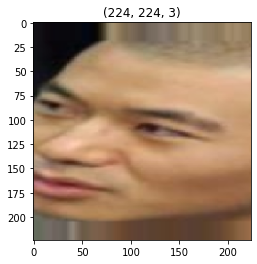

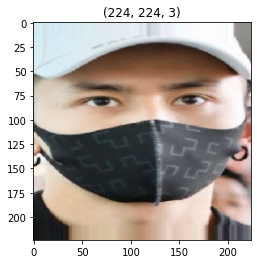

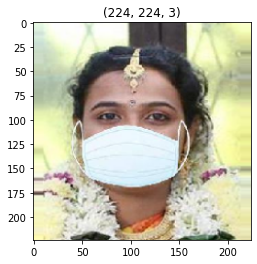

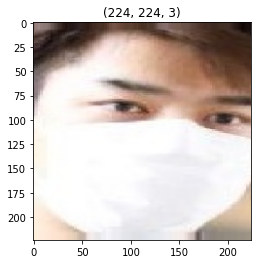

In [75]:
# to visualize the images in the traing data denerator 

t_img , label = train_data.next()

#-----------------------------------------------------------------------------
# function when called will prot the images 
def plotImages(img_arr, label):
  """
  input  :- images array 
  output :- plots the images 
  """
  count = 0
  for im, l in zip(img_arr,label) :
    plt.imshow(im)
    plt.title(im.shape)
    plt.axis = False
    plt.show()
    
    count += 1
    if count == 10:
      break

#-----------------------------------------------------------------------------
# function call to plot the images 
plotImages(t_img, label)

In [ ]:
class BasicPreprocessing:
    
    def __init__(self):
        pass
    
    def import_dataset(self):
        """
        Method
        ------
            Import the given dataset.
        
        Parameters
        ----------
            As required
          
        """
        pass
    
    def bgr_2_gray(self):
        """
        Method
        ------
            Convert images to gray scale.
        
        Parameters
        ----------
            As required
          
        """
        pass
    
    def resize(self):
        """
        Method
        ------
            Resize every image to maintain the consistency.
        
        Parameters
        ----------
            As required
          
        """
        pass
    
    def normalize(self):
        """
        Method
        ------
            Normalized the extracted values to solve the model learning challenge.
        
        Parameters
        ----------
            As required
          
        """
        pass
    
    def cate_to_dummy(self):
        """
        Method
        ------
            Perform one-hot encoding or any other encoding method to convert categorical data into numbers.
        
        Parameters
        ----------
            As required
          
        """
        pass
    
    def reshape_data(self):
        """
        Method
        ------
            Perform reshaping functions to reshape data in a way that a model can take.
        
        Parameters
        ----------
            As required
          
        """
        pass
    
    def train_test(self):
        """
        Method
        ------
            Split data into training, testing and validation if needed.
        
        Parameters
        ----------
            As required
          
        """
        pass
    

    # All other customized methods go under here
    
    def any_name(self):
        pass

In [77]:
## having early stopping and model check point 

from keras.callbacks import ModelCheckpoint, EarlyStopping

# early stopping
es = EarlyStopping(monitor='val_accuracy', min_delta= 0.01 , patience= 5, verbose= 1, mode='auto')

# model check point
mc = ModelCheckpoint(filepath="best_model.h5", monitor= 'val_accuracy', verbose= 1, save_best_only= True, mode = 'auto')

# puting call back in a list 
call_back = [es, mc]

There are many ways that you can develop either a machine learing model or deep learning model. Also you can use pretrained models like Resnet50, VGG16, VGG19 etc. But under this task you will be asked to develop a simple model without using any pretrained model.

**Hint: Use tensorflow, pytorch or any ML framework you are comfortable with to extract features**

In [82]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.models import load_model
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

plt.style.use('dark_background')

In [83]:
#Load Models
facenet = cv2.dnn.readNet('models/deploy.prototxt', 'models/res10_300x300_ssd_iter_140000.caffemodel')
model = load_model('models/mask_detector.model')

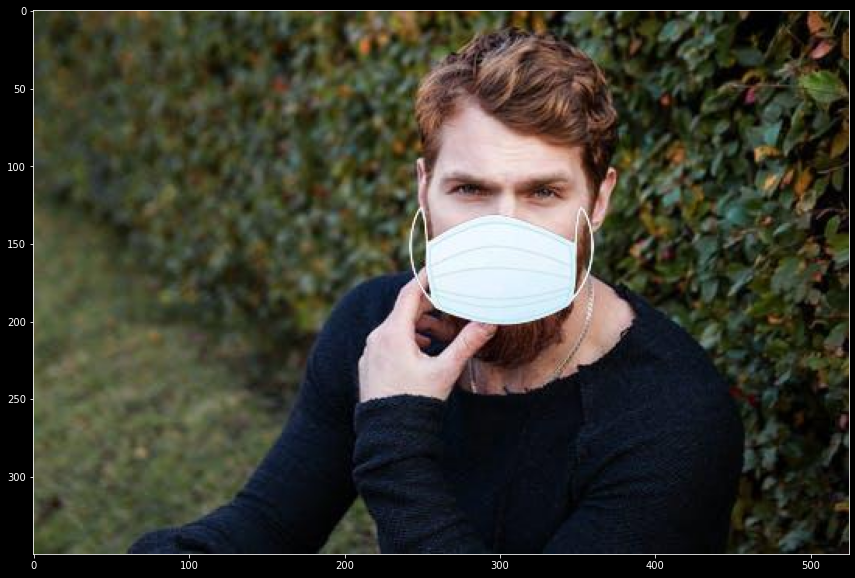

In [84]:
#Load Image
img = cv2.imread('Dataset/with_mask/with_mask_1.jpg')
h, w = img.shape[:2]

plt.figure(figsize=(16, 10))
plt.imshow(img[:, :, ::-1])

In [85]:
#Preprocess Image for Face Detection
blob = cv2.dnn.blobFromImage(img, scalefactor=1., size=(300, 300), mean=(104., 177., 123.))
facenet.setInput(blob)
dets = facenet.forward()

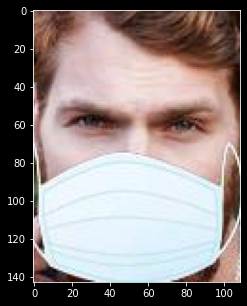

In [86]:
#Detect Faces
faces = []

for i in range(dets.shape[2]):
    confidence = dets[0, 0, i, 2]
    if confidence < 0.5:
        continue

    x1 = int(dets[0, 0, i, 3] * w)
    y1 = int(dets[0, 0, i, 4] * h)
    x2 = int(dets[0, 0, i, 5] * w)
    y2 = int(dets[0, 0, i, 6] * h)
    
    face = img[y1:y2, x1:x2]
    faces.append(face)

plt.figure(figsize=(16, 5))

for i, face in enumerate(faces):
    plt.subplot(1, len(faces), i+1)
    plt.imshow(face[:, :, ::-1])

1/1 [==============================] - 2s 2s/step


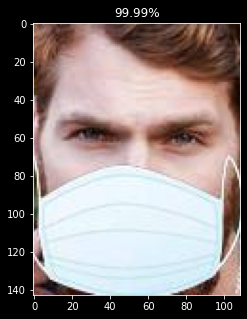

In [87]:
#Detect Masks from Face
plt.figure(figsize=(16, 5))

for i, face in enumerate(faces):
    face_input = cv2.resize(face, dsize=(224, 224))
    face_input = cv2.cvtColor(face_input, cv2.COLOR_BGR2RGB)
    face_input = preprocess_input(face_input)
    face_input = np.expand_dims(face_input, axis=0)
    
    mask, nomask = model.predict(face_input).squeeze()

    plt.subplot(1, len(faces), i+1)
    plt.imshow(face[:, :, ::-1])
    plt.title('%.2f%%' % (mask * 100))

### Basic Inference Techniques

In here you will be asked to develop a detection method to detect masked faces in static images.